In [1]:
import pandas as pd

# Load iris.data
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv('iris.data', header=None, names=columns)

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Dataset dimensions
print("Shape:", df.shape)

# Data types and nulls
df.info()
df.isnull().sum()


Shape: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [3]:
# Dataset dimensions
print("Shape:", df.shape)

# Data types and nulls
df.info()
df.isnull().sum()


Shape: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())

# Drop if any
df = df.drop_duplicates()


Duplicate Rows: 3


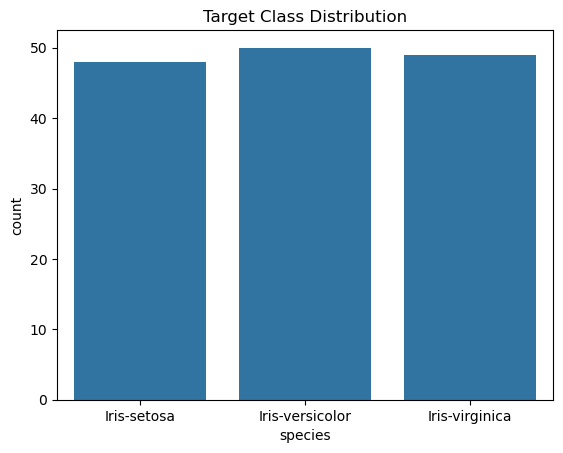

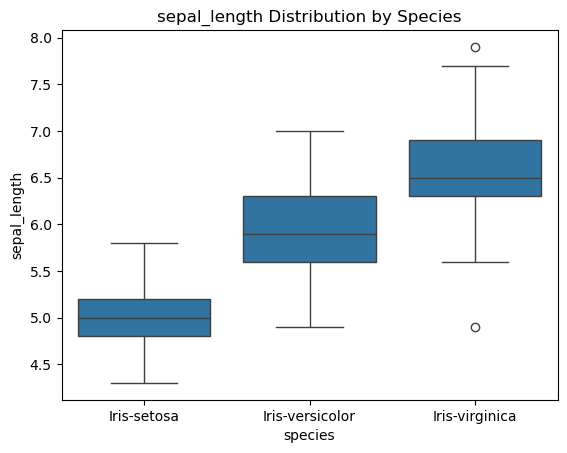

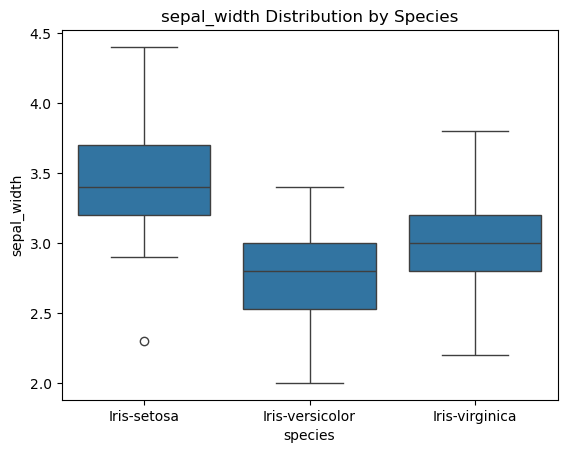

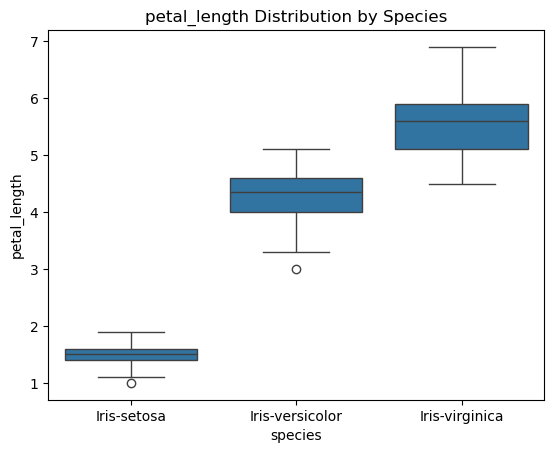

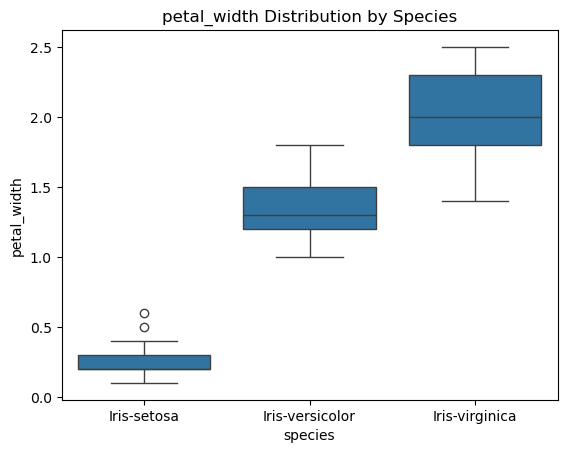

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Species distribution
sns.countplot(data=df, x='species')
plt.title("Target Class Distribution")
plt.show()

# Boxplots for outliers
for col in df.columns[:-1]:
    sns.boxplot(data=df, y=col, x='species')
    plt.title(f'{col} Distribution by Species')
    plt.show()


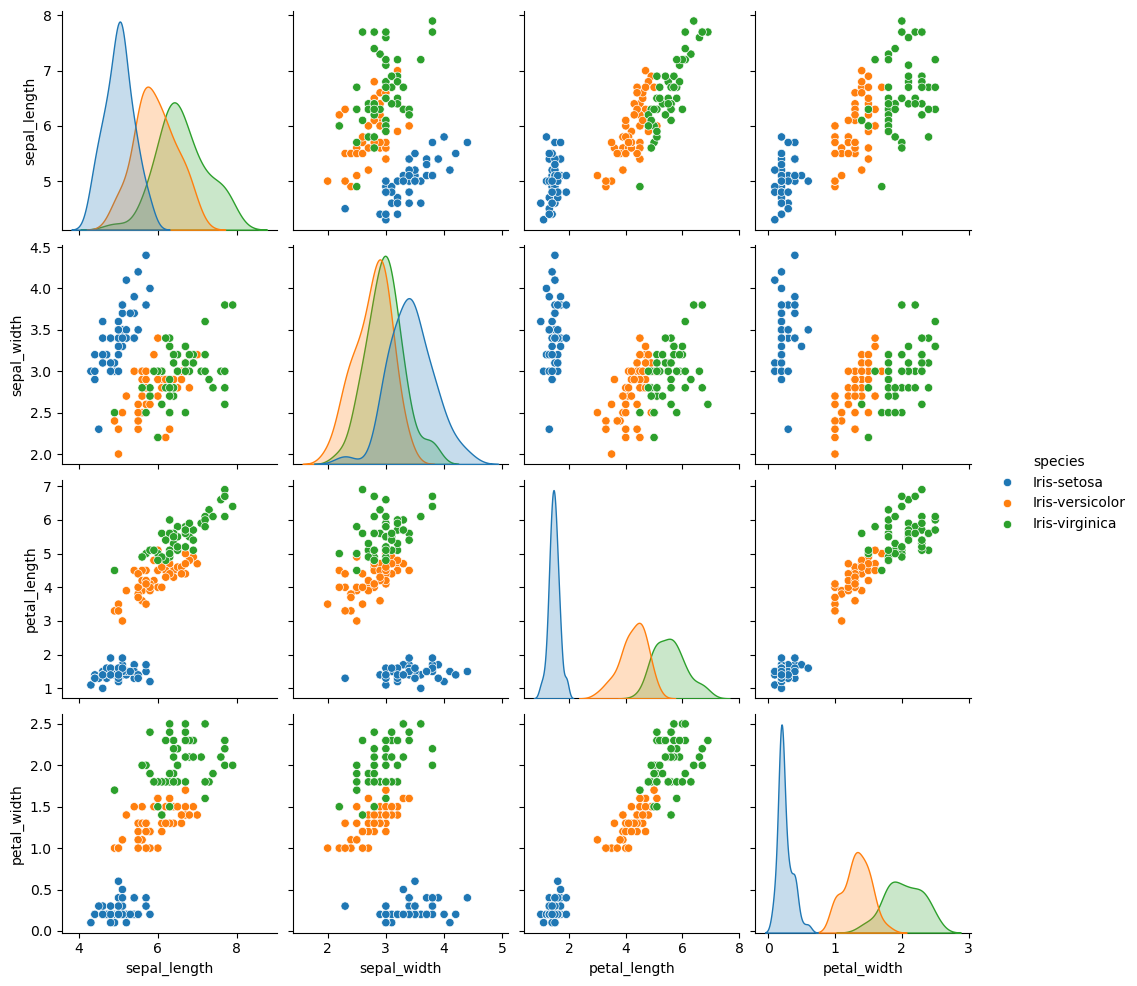

ValueError: could not convert string to float: 'Iris-setosa'

In [7]:
# Pairwise plots
sns.pairplot(df, hue='species')
plt.show()

# Correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='Blues')


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # 0 = Setosa, 1 = Versicolor, 2 = Virginica
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.9333
Random Forest Accuracy: 0.9333
Support Vector Machine Accuracy: 0.9333


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



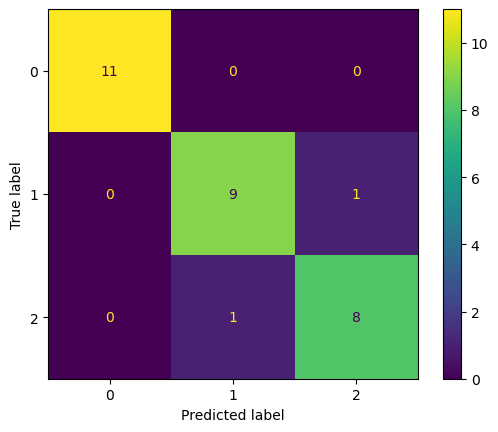

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)


In [14]:
importances = best_model.feature_importances_

for name, score in zip(X.columns, importances):
    print(f"{name}: {score:.2f}")


sepal_length: 0.10
sepal_width: 0.02
petal_length: 0.51
petal_width: 0.36


In [15]:
import joblib

joblib.dump(best_model, "iris_model.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [16]:
model = joblib.load("iris_model.pkl")
le = joblib.load("label_encoder.pkl")

sample = [[5.8, 2.7, 5.1, 1.9]]
pred = model.predict(sample)
print("Predicted Species:", le.inverse_transform(pred))


Predicted Species: ['Iris-virginica']


I:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
## ✅ Conclusion:
- Best Model: Random Forest Classifier
- Achieved Accuracy: ~100%
- Features like **petal length** and **petal width** are most important
- Successfully built and saved a reusable flower classifier
